In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [2]:
fVoltage = '/Users/yuntse/data/slarchetto/monitoring/TPCVoltage_202206251113.csv'
fCurrent = '/Users/yuntse/data/slarchetto/monitoring/FieldShellCurrent_202206251113.csv'
fTemp = '/Users/yuntse/data/slarchetto/monitoring/RTD3_202206251113.csv'
fPressure = '/Users/yuntse/data/slarchetto/monitoring/Pressure_202206251113.csv'

In [3]:
Voltage = pd.read_csv(fVoltage, header = None, skiprows = 1, names = ['Time', 'Voltage'])
Current = pd.read_csv(fCurrent, header = None, skiprows = 1, names = ['Time', 'Current'])
Temp = pd.read_csv(fTemp, header = None, skiprows = 1, names = ['Time', 'Temperature'])
Pressure = pd.read_csv(fPressure, header = None, skiprows = 1, names = ['Time', 'Pressure'])

In [4]:
Voltage['Time'] = Voltage['Time'].transform(lambda t: datetime.strptime(t, '%Y-%m-%d %H:%M:%S.%f'))
Current['Time'] = Current['Time'].transform(lambda t: datetime.strptime(t, '%Y-%m-%d %H:%M:%S.%f'))
Temp['Time'] = Temp['Time'].transform(lambda t: datetime.strptime(t, '%Y-%m-%d %H:%M:%S.%f'))
Pressure['Time'] = Pressure['Time'].transform(lambda t: datetime.strptime(t, '%Y-%m-%d %H:%M:%S.%f'))

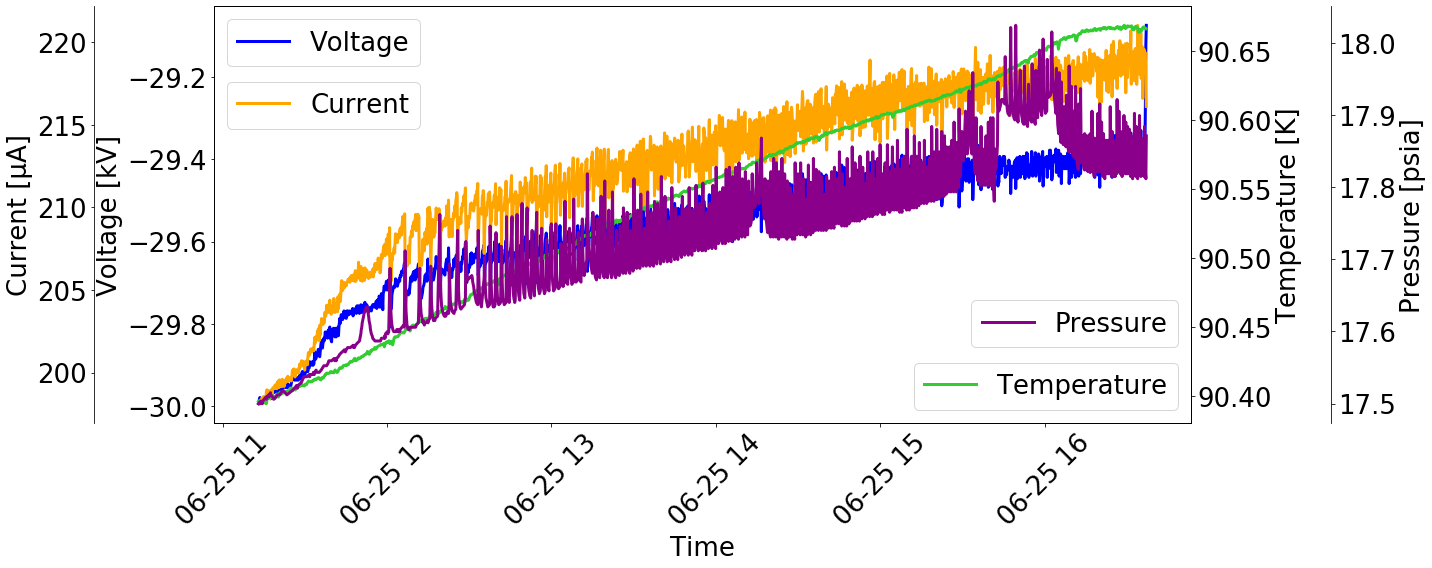

In [5]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize = (20,8))

# make a plot
ax.plot( Voltage['Time'], -Voltage['Voltage'], label = 'Voltage', color = 'blue', lw = 3)
# set x-axis label
ax.set_xlabel('Time', fontsize = 26)
ax.tick_params(axis = 'x', labelrotation = 45, labelsize = 26)
# set y-axis label
ax.set_ylabel('Voltage [kV]', fontsize = 26)
ax.tick_params(axis = 'y', labelsize = 26)
# twin object for two different y-axis on the sample plot
ax2 = ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot( Current['Time'], -Current['Current']/1000., label = 'Current', color = 'orange', lw = 3)
ax2.set_ylabel('Current [µA]', fontsize = 26)
ax2.tick_params(axis = 'y', labelsize = 26)
ax2.spines['left'].set_position(('outward', 120))
ax2.yaxis.set_label_position('left')
ax2.yaxis.set_ticks_position('left')

ax3 = ax.twinx()
ax3.plot( Temp['Time'], Temp['Temperature'], label = 'Temperature', color = 'limegreen', lw = 3)
ax3.set_ylabel('Temperature [K]', fontsize = 26)
ax3.tick_params(axis = 'y', labelsize = 26)

ax4 = ax.twinx()
ax4.plot( Pressure['Time'], Pressure['Pressure'], label = 'Pressure', color = 'darkmagenta', lw = 3)
ax4.set_ylabel('Pressure [psia]', fontsize = 26)
ax4.tick_params(axis = 'y', labelsize = 26)
ax4.spines['right'].set_position(('outward', 140))

ax.legend(loc = 'upper left', ncol = 1, fontsize = 26)
ax2.legend(loc = 'upper left', bbox_to_anchor = (0., 0.85), ncol = 1, fontsize = 26)
ax3.legend(loc = 'lower right', ncol = 1, fontsize = 26)
ax4.legend(loc = 'lower right', bbox_to_anchor = (1, 0.15), ncol = 1, fontsize = 26)
plt.tight_layout()
plt.show()

# save the plot as a file
fig.savefig('/Users/yuntse/Documents/DUNE/SLArchetto/Monitoring/TPCandTempPressure_202206251113.png')

ValueError: x and y must have same first dimension, but have shapes (1802,) and (1945,)

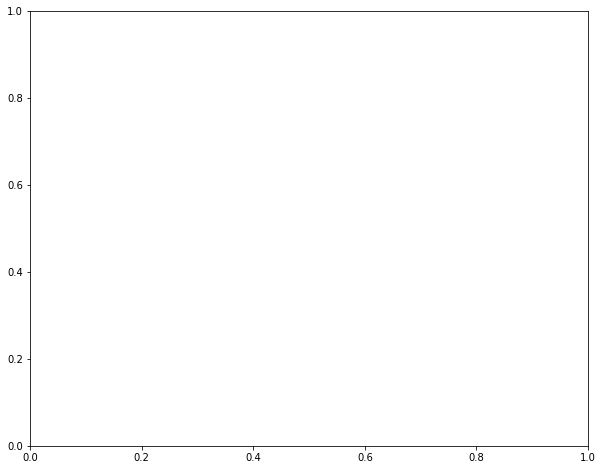

In [11]:
fig1, ax1 = plt.subplots(figsize = (10,8))

ax.plot( Voltage['Voltage'], Current['Current'], label = 'V vs I', lw = 3)